In [1]:
import pandas as pd
import numpy as np
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("winequality-red.csv")

In [3]:
df

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,1
1315,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1316,1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1317,1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,1


In [4]:
df.describe()

,Unnamed: 0,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,791.984079,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,0.516300
std,470.718363,1.682935,0.167679,0.187995,1.399633,0.047538,10.492335,32.714030,0.001815,0.152345,0.167334,0.972354,0.499924
min,0.000000,4.700000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.860000,0.370000,8.400000,0.000000
25%,381.500000,7.100000,0.410000,0.090000,1.900000,0.071000,8.000000,24.000000,0.995800,3.210000,0.540000,9.500000,0.000000
50%,767.000000,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,40.000000,0.996800,3.310000,0.610000,10.000000,1.000000
75%,1218.500000,9.100000,0.640000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.400000,0.700000,10.900000,1.000000
max,1598.000000,15.900000,1.330000,0.790000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,1.980000,14.900000,1.000000


In [5]:
df = df.drop(columns=['Unnamed: 0'])

df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [6]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000,1319.000000
mean,8.254284,0.538560,0.258264,2.503867,0.088973,16.368461,48.946929,0.996867,3.311296,0.647263,10.252717,0.516300
std,1.682935,0.167679,0.187995,1.399633,0.047538,10.492335,32.714030,0.001815,0.152345,0.167334,0.972354,0.499924
min,4.700000,0.160000,0.000000,0.900000,0.034000,1.000000,6.000000,0.990070,2.860000,0.370000,8.400000,0.000000
25%,7.100000,0.410000,0.090000,1.900000,0.071000,8.000000,24.000000,0.995800,3.210000,0.540000,9.500000,0.000000
50%,7.800000,0.540000,0.240000,2.200000,0.080000,14.000000,40.000000,0.996800,3.310000,0.610000,10.000000,1.000000
75%,9.100000,0.640000,0.400000,2.600000,0.091000,22.000000,65.000000,0.997900,3.400000,0.700000,10.900000,1.000000
max,15.900000,1.330000,0.790000,15.500000,0.611000,72.000000,165.000000,1.003690,4.010000,1.980000,14.900000,1.000000


In [7]:
df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

array([[<Axes: title={'center': 'fixed acidity'}>,
        <Axes: title={'center': 'volatile acidity'}>,
        <Axes: title={'center': 'citric acid'}>],
       [<Axes: title={'center': 'residual sugar'}>,
        <Axes: title={'center': 'chlorides'}>,
        <Axes: title={'center': 'free sulfur dioxide'}>],
       [<Axes: title={'center': 'total sulfur dioxide'}>,
        <Axes: title={'center': 'density'}>,
        <Axes: title={'center': 'pH'}>],
       [<Axes: title={'center': 'sulphates'}>,
        <Axes: title={'center': 'alcohol'}>,
        <Axes: title={'center': 'quality'}>]], dtype=object)

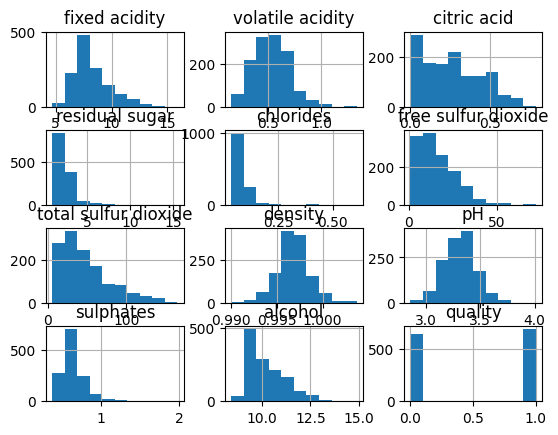

In [9]:
df.hist()

In [10]:
X = df.drop('quality', axis=1)
y = df['quality']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
scaler = StandardScaler()
lr = LogisticRegression()

pipeline_lr = Pipeline([
    ('scaler', scaler),
    ('lr', lr)
])

In [15]:
pipeline_lr.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LogisticRegression())])

In [16]:
print(f"Score de Entrenamiento: {pipeline_lr.score(X_train, y_train)}")
print(f"Score de test: {pipeline_lr.score(X_test, y_test)}")

Score de Entrenamiento: 0.7061611374407583
Score de test: 0.7159090909090909


In [17]:
from sklearn.svm import SVC

In [18]:
scaler = StandardScaler()
svc = SVC()

pipeline_svc = Pipeline([
    ('scaler', scaler),
    ('svc', svc)
])

In [19]:
pipeline_svc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC())])

In [20]:
print(f"Score de entrenamiendo: {pipeline_svc.score(X_train, y_train)}")
print(f"Score de test: {pipeline_svc.score(X_test, y_test)}")

Score de entrenamiendo: 0.7649289099526067
Score de test: 0.7348484848484849


In [21]:
from sklearn.model_selection import GridSearchCV

param_grid ={
    "svc__C" :[10,100,1000],
    "svc__kernel": ["poly", "rbf"],
    "svc__gamma": [0.5]
}

grid_search = GridSearchCV(pipeline_svc, param_grid, cv=3)
grid_search.fit(X_train, y_train)

In [ ]:
grid_search.best_score_

0.6881690840024173

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
pca = PCA()
dtc = DecisionTreeClassifier()

# Creamos un pipeline que incluye la normalización, reducción de dimensionalidad y el modelo de árbol de decisión
pipeline_dtc = Pipeline([
    ("scaler", scaler),  # Paso 1: Normalización de las características
    ("pca", pca),        # Paso 2: Reducción de dimensionalidad con PCA
    ("dtc", dtc)         # Paso 3: Modelo de árbol de decisión
])

In [ ]:
pipeline_dtc.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('dtc', DecisionTreeClassifier())])

In [ ]:
print(f"Score de entrenamiento: {pipeline_dtc.score(X_train, y_train)}")
print(f"Score de test: {pipeline_dtc.score(X_test, y_test)}")

Score de entrenamiento: 1.0
Score de test: 0.6553030303030303
